In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import seaborn as sns

In [4]:
%pip install scikit-learn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Note: you may need to restart the kernel to use updated packages.


In [5]:
sns.set(style='whitegrid', palette='muted', color_codes=True)

In [9]:
# Data Loading and Preprocessing

# The data file is in the local directory. Let's load it.
data_path = 'MSFT_1986-03-13_2025-02-04.csv'

# Load data and parse the 'Date' column as datetime. Parsing dates is crucial because it helps in time-based indexing.
try:
    df = pd.read_csv(data_path, parse_dates=['Date'])
except Exception as e:
    # If you encounter an error here, it might be due to the date parsing. Double-check the date format in the CSV.
    print("Error parsing the date column. Please verify the CSV date format.")
    raise e

# Sort data by date
df.sort_values('Date', inplace=True)

# Reset index after sorting
df.reset_index(drop=True, inplace=True)

print('Data loaded successfully, with {} rows and {} columns.'.format(df.shape[0], df.shape[1]))
print('Data types:')
print(df.dtypes)

Data loaded successfully, with 9800 rows and 7 columns.
Data types:
Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object


In [10]:
print(df.head())

        Date      Open      High       Low     Close  Adj Close      Volume
0 1986-03-13  0.088542  0.101563  0.088542  0.097222   0.059827  1031788800
1 1986-03-14  0.097222  0.102431  0.097222  0.100694   0.061963   308160000
2 1986-03-17  0.100694  0.103299  0.100694  0.102431   0.063032   133171200
3 1986-03-18  0.102431  0.103299  0.098958  0.099826   0.061429    67766400
4 1986-03-19  0.099826  0.100694  0.097222  0.098090   0.060361    47894400


In [11]:
print(df.describe())

                                Date         Open         High          Low  \
count                           9800  9800.000000  9800.000000  9800.000000   
mean   2005-08-14 05:24:00.000000128    63.173728    63.812493    62.513818   
min              1986-03-13 00:00:00     0.088542     0.092014     0.088542   
25%              1995-11-16 18:00:00     5.898438     5.976563     5.794922   
50%              2005-08-11 12:00:00    27.436250    27.770000    27.200001   
75%              2015-05-07 06:00:00    47.597813    48.145000    47.062500   
max              2025-02-03 00:00:00   467.000000   468.350006   464.459991   
std                              NaN    98.682750    99.575073    97.725918   

             Close    Adj Close        Volume  
count  9800.000000  9800.000000  9.800000e+03  
mean     63.187157    57.451679  5.630897e+07  
min       0.090278     0.055554  2.304000e+06  
25%       5.880860     3.618860  3.141062e+07  
50%      27.490000    19.266710  4.946235e+07  


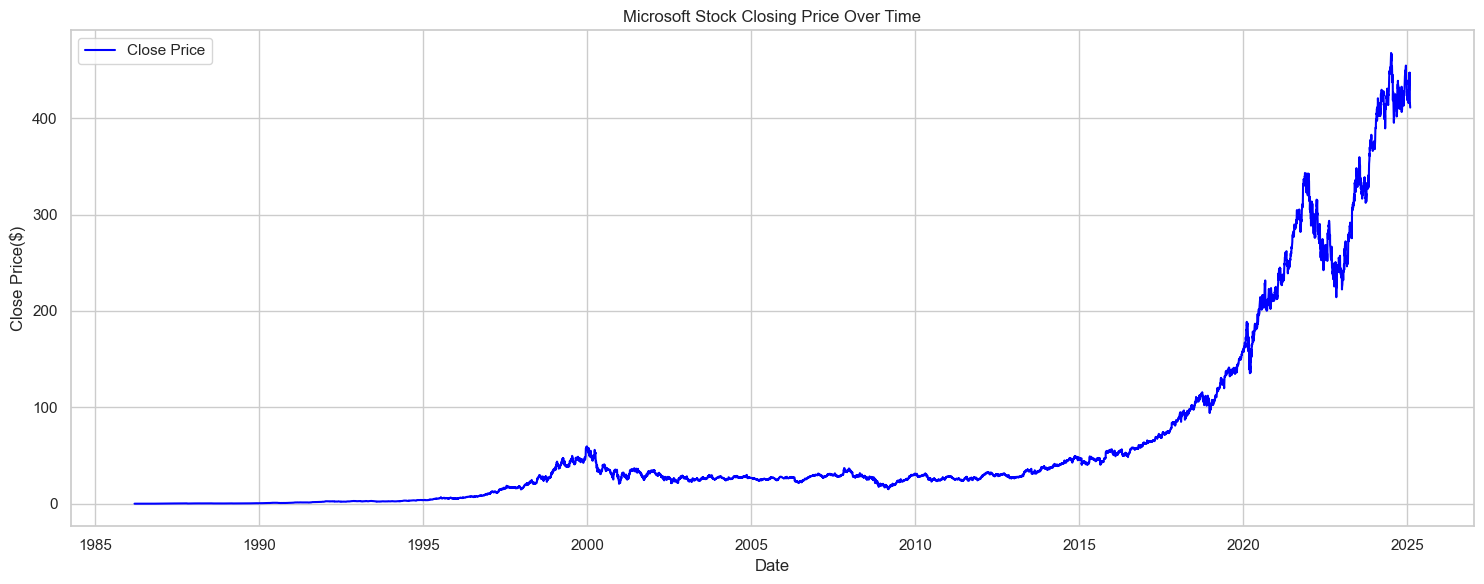

In [12]:
plt.figure(figsize=(15, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
plt.title('Microsoft Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price($)')
plt.legend()
plt.tight_layout()
plt.show()

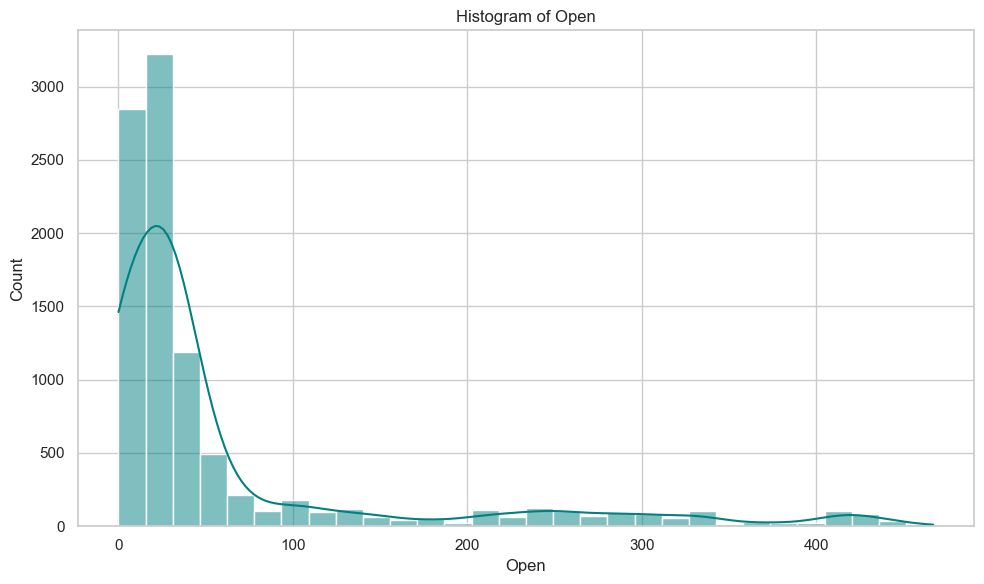

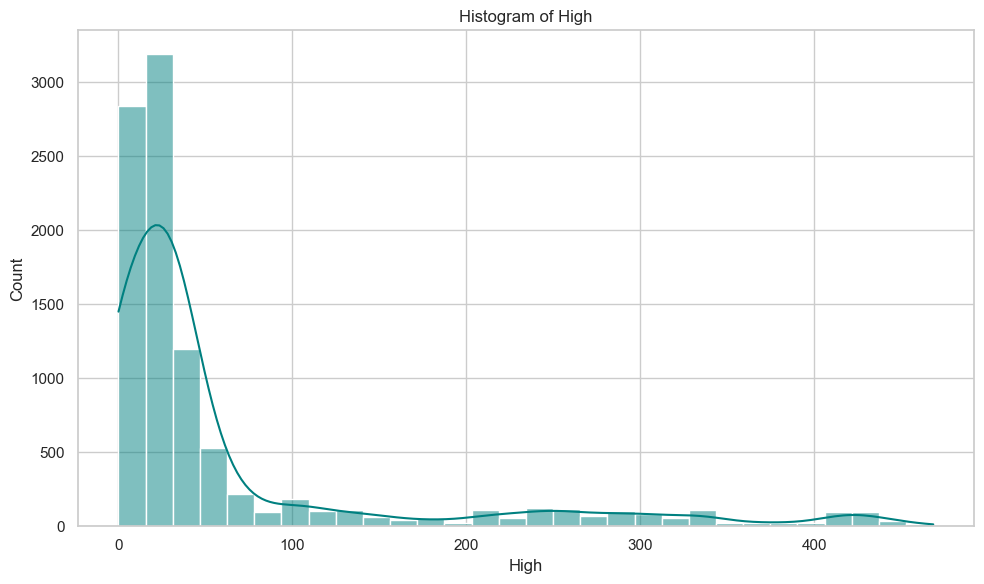

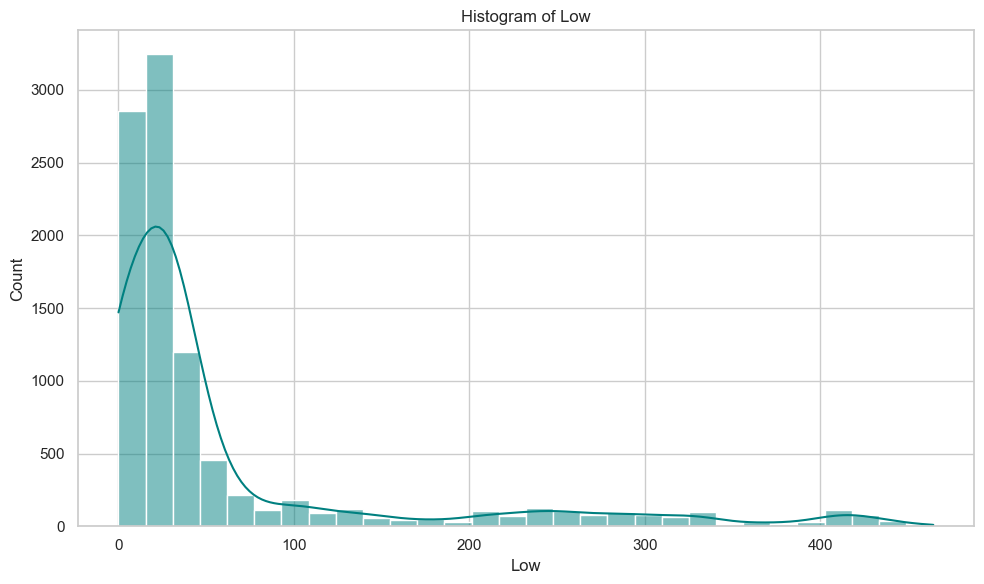

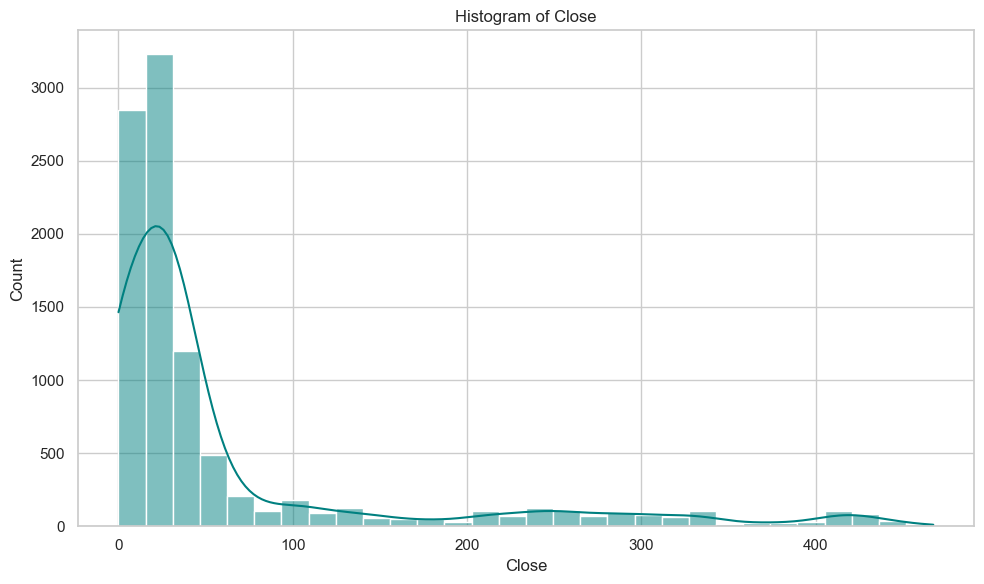

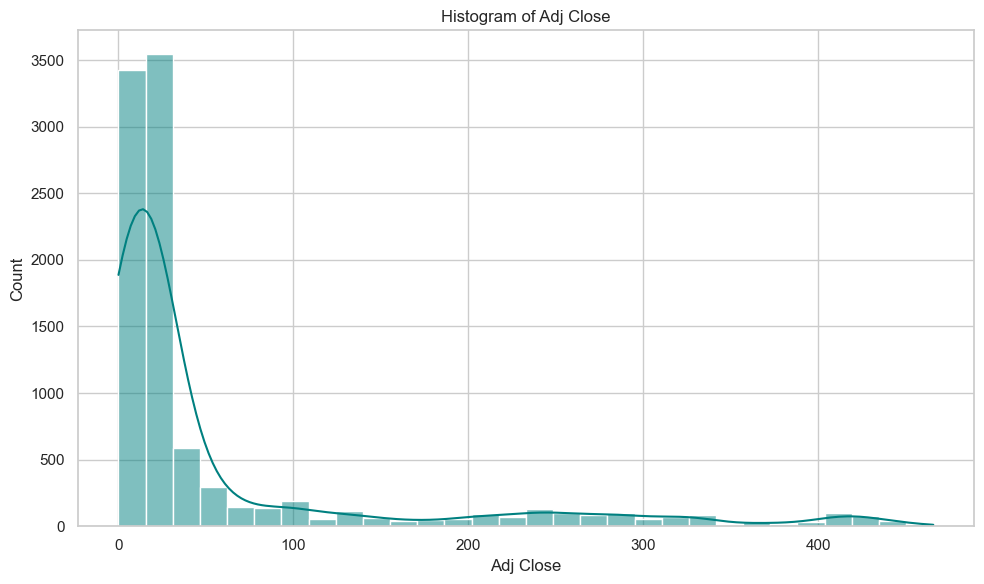

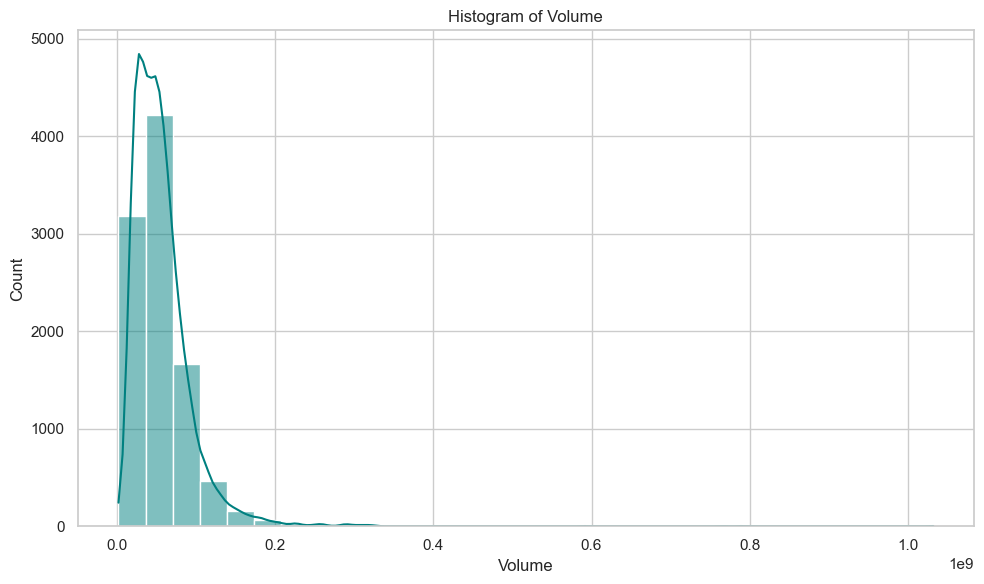

In [13]:
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
for col in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True, bins=30, color='teal')
    plt.title(f'Histogram of {col}')
    plt.tight_layout()
    plt.show()

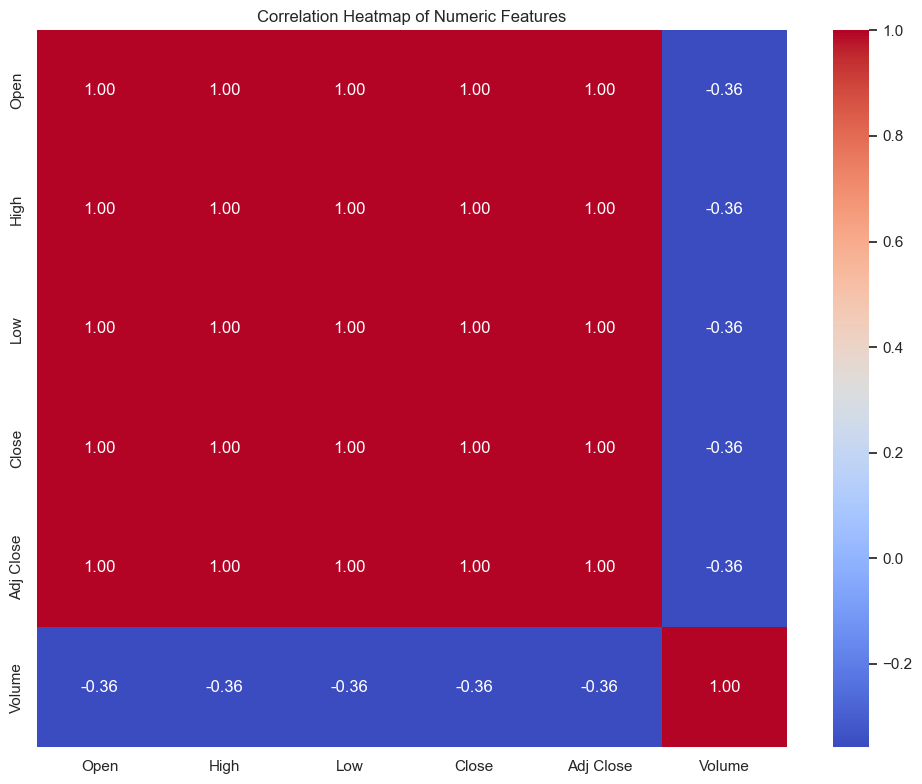

In [14]:
numeric_df = df.select_dtypes(include=[np.number])
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(10, 8))
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
    plt.title('Correlation Heatmap of Numeric Features')
    plt.tight_layout()
    plt.show()
else:
    print('Insufficient numeric features for a correlation matrix.')

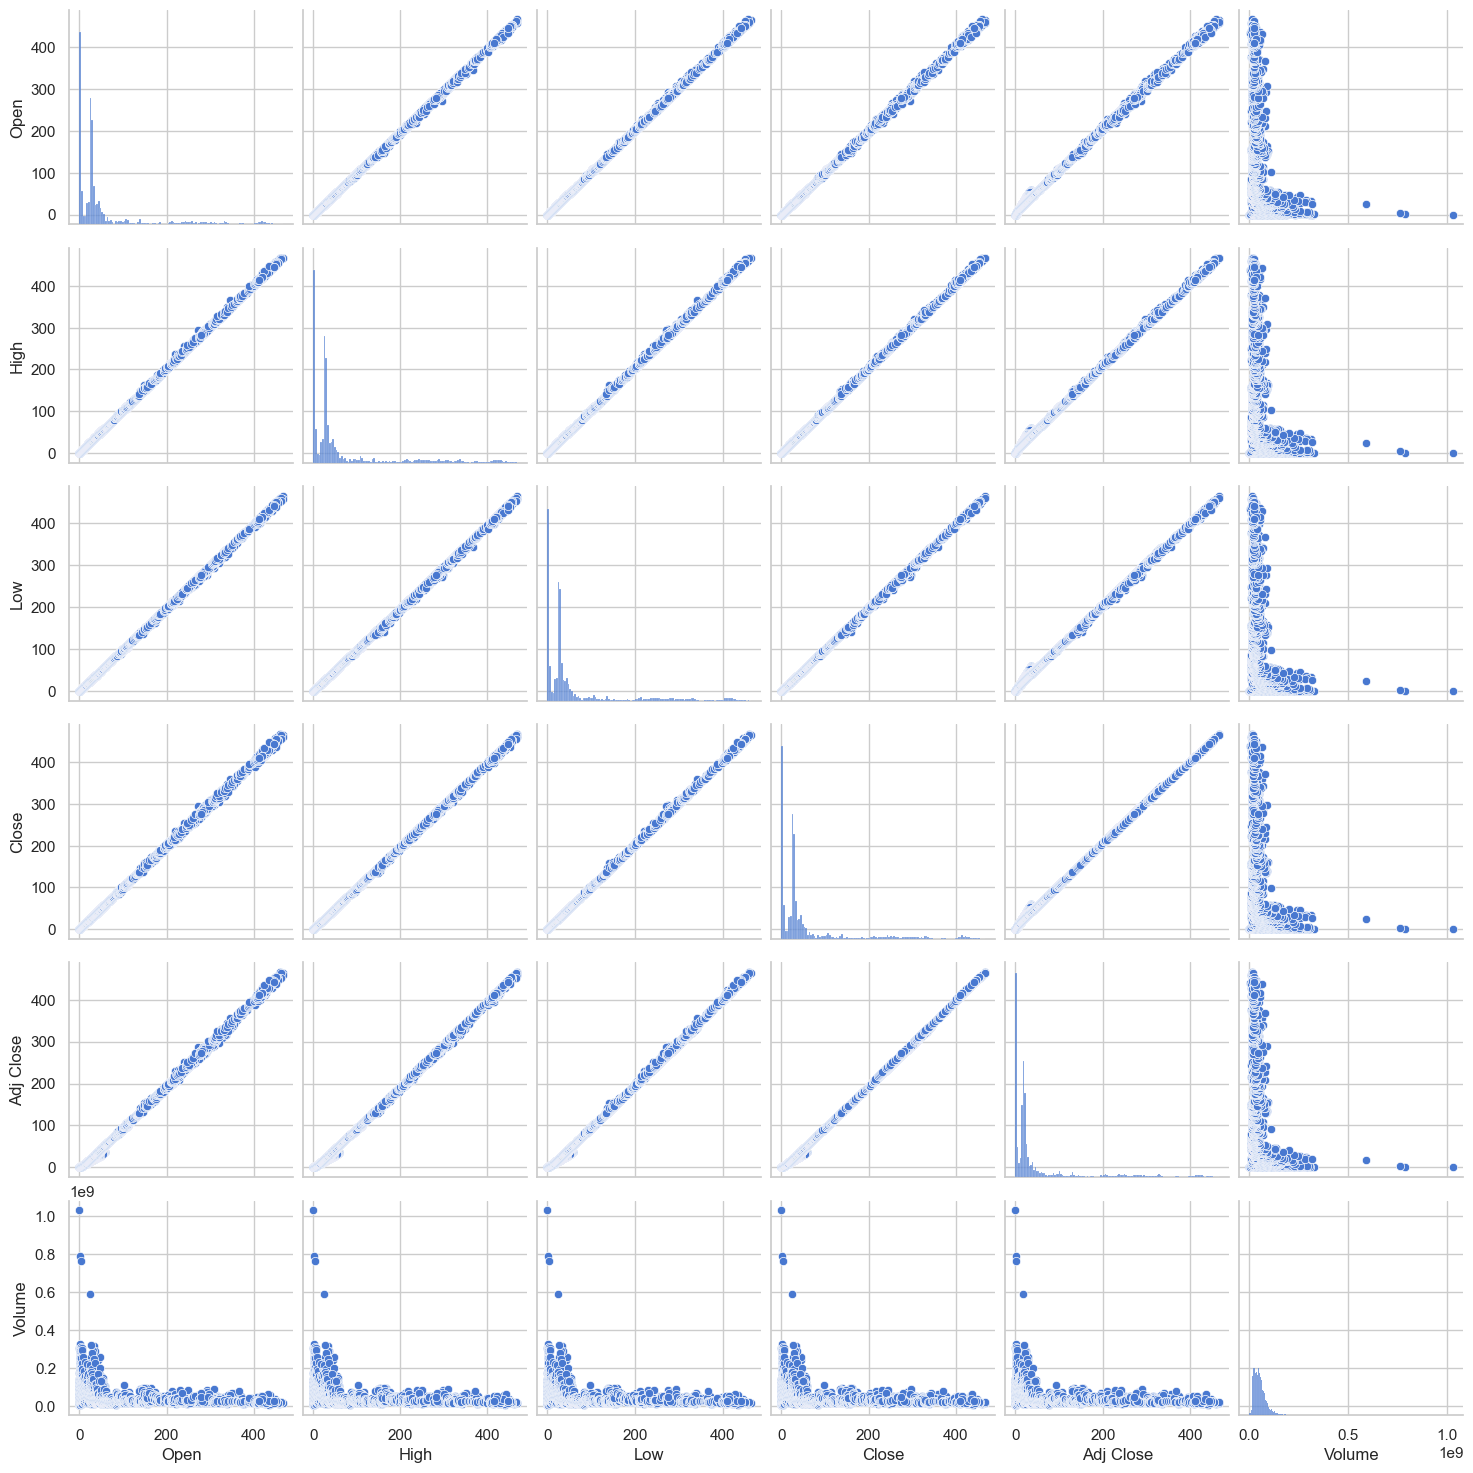

In [15]:
sns.pairplot(df[numeric_columns])
plt.show()

In [16]:
df['Next_Close'] = df['Close'].shift(-1)

In [17]:
df_model = df.dropna(subset=['Next_Close']).copy()

In [18]:
features = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
target = 'Next_Close'

In [20]:
X_train, X_test, y_train, y_test = train_test_split(df_model[features], df_model[target], test_size=0.2, shuffle=False)

In [21]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [22]:
y_pred = model.predict(X_test)

In [23]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [24]:
print(f'Linear Regression Model Performance:')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'RecursionError Score (R2): {r2:.2f}')

Linear Regression Model Performance:
Root Mean Squared Error (RMSE): 4.14
RecursionError Score (R2): 1.00


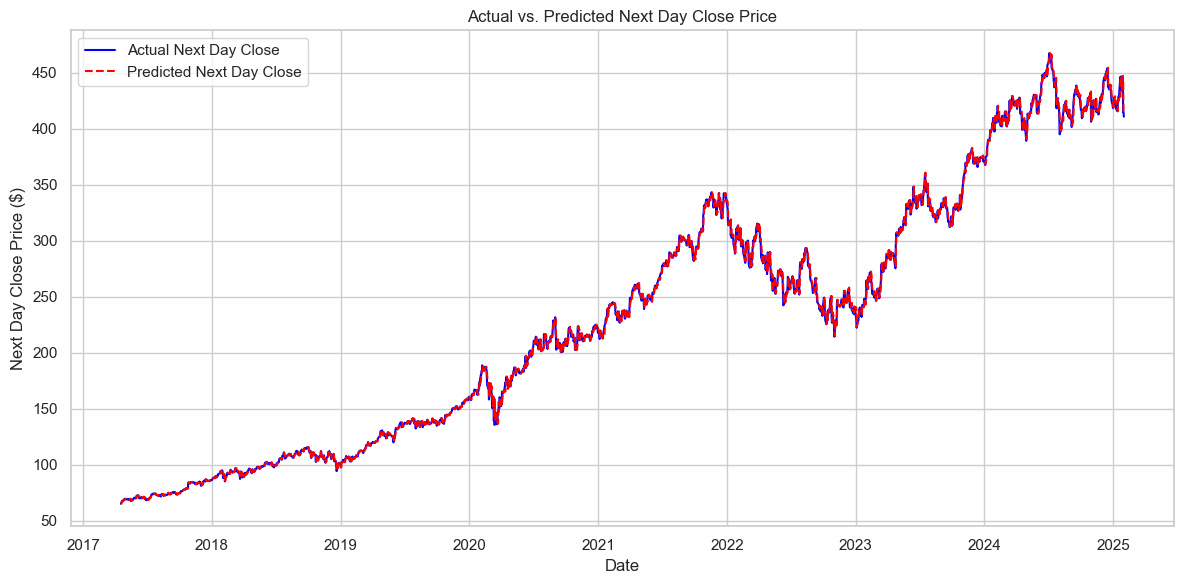

In [25]:
plt.figure(figsize=(12,6))
plt.plot(df_model['Date'].iloc[y_test.index], y_test, label='Actual Next Day Close', color='blue')
plt.plot(df_model['Date'].iloc[y_test.index], y_pred, label='Predicted Next Day Close', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Next Day Close Price ($)')
plt.title('Actual vs. Predicted Next Day Close Price')
plt.legend()
plt.tight_layout()
plt.show()

In [26]:
coefficients = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_})
coefficients = coefficients.sort_values(by='Coefficient', key=abs, ascending=True)

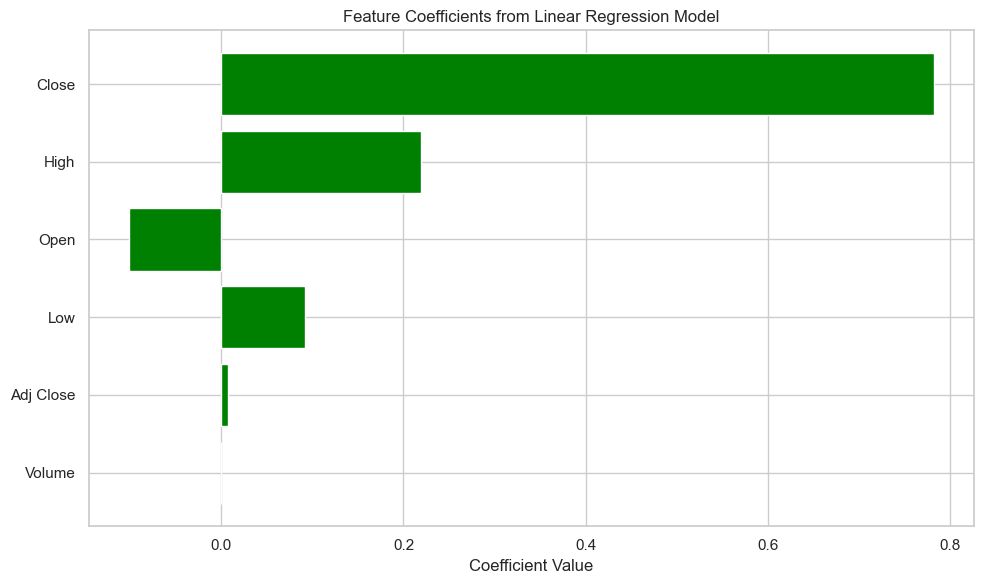

In [27]:
plt.figure(figsize=(10, 6))
plt.barh(coefficients['Feature'], coefficients['Coefficient'], color='green')
plt.title('Feature Coefficients from Linear Regression Model')
plt.xlabel('Coefficient Value')
plt.tight_layout()
plt.show()

Conclusion:
In this notebook we explored the Microsoft stock dataset spanning decades and ventured into building a simple predictor for the next day's closing price. We used several visualization techniques including time series plots, histograms, pair plots, and correlation heatmaps to better understand the data. The linear regression model, while rudimentary, provides an initial peek into the predictive aspects of such financial data.